# Football Player & Field Detection – YOLO Training Notebook

This notebook will help you:

1. Verify your PyTorch + CUDA setup (so GPU works).
2. Install and import Ultralytics YOLO.
3. Train a YOLO model on your **Roboflow football dataset** using `data.yaml`.
4. Run a quick prediction on a sample image.

> **Tip:** Save this notebook in the same folder as your `data.yaml` (e.g. `Football Player Detection/`).

In [19]:
import os
import sys
%matplotlib inline

print("Python version:", sys.version)
print("Current working directory:", os.getcwd())

# If this is not the folder that contains data.yaml,
# you can change directory like this (edit the path):
# os.chdir("/home/ejp111/CVWork/Football Player Detection")
# print("New working directory:", os.getcwd())

Python version: 3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]
Current working directory: C:\Users\z\Documents\GitHub\NFL_Play_Outcome_Classifier


In [2]:
# If PyTorch is not installed in this environment, uncomment and run:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA version (built with):", torch.version.cuda)
    print("Device count:", torch.cuda.device_count())
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is NOT available. If you expected GPU support, you may need to reinstall PyTorch with CUDA support as per PyTorch docs.")

Torch version: 2.6.0+cu124
CUDA available: True
CUDA version (built with): 12.4
Device count: 1
Device name: NVIDIA GeForce RTX 4070 SUPER


In [3]:
# Install ultralytics (YOLO) if not already installed
# You can safely run this multiple times; it will just confirm the install.
!pip install ultralytics

In [4]:
from ultralytics import YOLO
import ultralytics

print("Ultralytics version:", ultralytics.__version__)

Ultralytics version: 8.3.229


In [6]:
import os

# Path to your dataset YAML
data_yaml_path = "./Football Player Detection.v7i.yolov11/data.yaml"

if not os.path.exists(data_yaml_path):
    print(f"data.yaml not found at: {os.path.abspath(data_yaml_path)}")
else:
    print(f"Found data.yaml at: {os.path.abspath(data_yaml_path)}")
    
    with open(data_yaml_path, "r") as f:
        print("\n----- data.yaml -----")
        print(f.read())
        print("----- end data.yaml -----")


Found data.yaml at: C:\Users\z\Documents\GitHub\NFL_Play_Outcome_Classifier\Football Player Detection.v7i.yolov11\data.yaml

----- data.yaml -----
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 8
names: ['ball', 'five_hash', 'hash', 'marker', 'number', 'player', 'pylon', 'ref']

roboflow:
  workspace: vayvay
  project: football-player-detection-xdjq7
  version: 7
  license: CC BY 4.0
  url: https://universe.roboflow.com/vayvay/football-player-detection-xdjq7/dataset/7
----- end data.yaml -----


In [12]:
# Train a YOLO model using your Roboflow dataset.
# Assumes data.yaml has correct train/val/test paths (e.g. train/images, valid/images, etc.).

# Choose a base model: 'yolo11n.pt' is tiny & fast; you can try 'yolo11s.pt' or bigger later.
base_model = "yolo11n.pt"

model = YOLO(base_model)

# If torch.cuda.is_available() is False, this will still run on CPU (slow).
# If CUDA is available, YOLO will automatically use the GPU.
results = model.train(
    data=data_yaml_path,
    classes=[0, 1, 2, 3, 4, 6],  # train only on these classes  # player, ref
    epochs=50,              # tweak as needed
    imgsz=1280,             # or 640 for faster/lower-res training
    batch=8,                # adjust based on GPU memory
    workers=4,
    name="football_yolo11n" # run name
)

results

Ultralytics 8.3.229  Python-3.11.14 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[0, 1, 2, 3, 4, 6], close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./Football Player Detection.v7i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=football_yolo11n2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BB5EC1AF90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    

In [13]:
# Evaluate the trained model on the validation set
# This will use the 'best' weights from the previous training run by default.

val_results = model.val(data=data_yaml_path)
val_results

Ultralytics 8.3.229  Python-3.11.14 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 SUPER, 12282MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 948.2289.4 MB/s, size: 138.7 KB)
val: Scanning C:\Users\z\Documents\GitHub\NFL_Play_Outcome_Classifier\Football Player Detection.v7i.yolov11\valid\labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 19/19 18.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 3.3s/it 6.6s<20.5s
                   all         19       1133      0.497      0.565      0.548        0.3
                  ball          2          2          0          0          0          0
             five_hash         17        196      0.827      0.791      0.837      0.422
                  hash         17        806      0.809       0.88      0.845      0.429
                marker         10       

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BBDFB00D90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

Class names: ['ball', 'five_hash', 'hash', 'marker', 'number', 'player', 'pylon', 'ref']
Using validation image path: C:\Users\z\Documents\GitHub\NFL_Play_Outcome_Classifier\Football Player Detection.v7i.yolov11\valid\images
Found 19 validation images
Random sample image: C:\Users\z\Documents\GitHub\NFL_Play_Outcome_Classifier\Football Player Detection.v7i.yolov11\valid\images\57509_001746_Sideline_frame0781_jpg.rf.93f8acad13799dd55225a683d8838fc6.jpg

image 1/1 C:\Users\z\Documents\GitHub\NFL_Play_Outcome_Classifier\Football Player Detection.v7i.yolov11\valid\images\57509_001746_Sideline_frame0781_jpg.rf.93f8acad13799dd55225a683d8838fc6.jpg: 384x640 7 five_hashs, 34 hashs, 5 numbers, 80.3ms
Speed: 1.5ms preprocess, 80.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


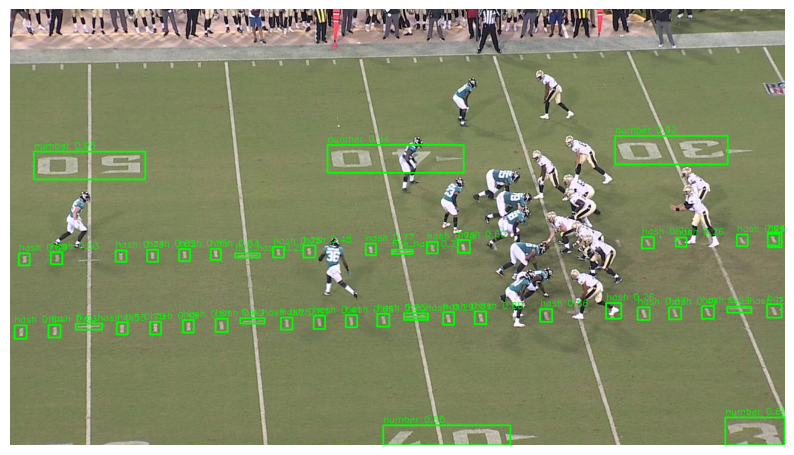

In [26]:
import yaml
import random
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import torch

# Load dataset YAML (only for class names)
data_yaml_path = Path("./Football Player Detection.v7i.yolov11/data.yaml").resolve()

with open(data_yaml_path, "r") as f:
    data_cfg = yaml.safe_load(f)

class_names = data_cfg["names"]
print("Class names:", class_names)

# Manually set the correct validation images path
val_images = Path("./Football Player Detection.v7i.yolov11/valid/images").resolve()
print("Using validation image path:", val_images)

all_imgs = list(val_images.glob("*.jpg")) + list(val_images.glob("*.png"))
print("Found", len(all_imgs), "validation images")

if len(all_imgs) == 0:
    raise ValueError(f"No images found in {val_images}")

sample_image = random.choice(all_imgs)
print("Random sample image:", sample_image)

# Run prediction with your trained model
results = model.predict(
    source=str(sample_image),
    imgsz=640,
    conf=0.25,
    device=0 if torch.cuda.is_available() else "cpu",
    save=False
)

# Draw detections
img = cv2.imread(str(sample_image))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        cls_id = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        label = f"{class_names[cls_id]} {conf:.2f}"

        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, max(0, y1 - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Run predictions on a folder of test images or a single image.
# Adjust 'source' to match where your test images are.

# Example: if your test images are in test/images/
source = "test/images"  # or a single file like "test/images/frame_0001.jpg"

pred_results = model.predict(
    source=source,
    imgsz=1280,
    save=True   # saves annotated images to runs/detect/predict
)

pred_results